# Context:

Leveraging customer information is paramount for most businesses. In the case of an
insurance company, attributes of customers like the ones mentioned below can be crucial
in making business decisions. Hence, knowing to explore and generate value out of such
data can be an invaluable skill to have.

# Attribute Information:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_ind #required to perform 2-sample t-test
from statsmodels.stats.proportion import proportions_ztest # required to perform test of proportions
#required to perform ANOVA test
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

## 2. Read data

In [3]:
data = pd.read_csv('insurance.csv')
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
644,43,male,35.310,2,no,southeast,18806.14547
654,59,female,35.200,0,no,southeast,12244.53100
1004,47,male,19.190,1,no,northeast,8627.54110
944,62,male,39.930,0,no,southeast,12982.87470
1074,60,female,18.335,0,no,northeast,13204.28565


## 3. Clean data, print shape, identify missing value and print data type

   ### i. Clean data and identify missing value

In [4]:
# First step would be to check whether any column has NA values.
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Second step would be to check whether any column has null values.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Since there is no null or NA value in the give dataframe, there is no requirement for any type of data cleaning.

### ii Print shape and data type

In [6]:
print("The shape of the given dataset is",data.shape)

The shape of the given dataset is (1338, 7)


In [7]:
print("The data type of the given dataset is")
print(data.dtypes)

The data type of the given dataset is
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 4. Identify outlier (use boxplot), perform feature analysis and data quality check

### i. Data quality check

In [8]:
# To find duplicate rows in the dataset.
duplicates = pd.DataFrame.duplicated(data)
print(duplicates[duplicates == True])
data = data.drop_duplicates()
print(data)

581    True
dtype: bool
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


### ii. 5 point summary of numerical attributes

In [9]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### iii. Identify outlier (use boxplot)

In [47]:
# First step would be convert all non-numerical (string) columns into numerical columns
region_new = pd.get_dummies(data['region'])
sex_new = pd.get_dummies(data['sex'])
smoker_new = pd.get_dummies(data['smoker'])
data_new = pd.concat([data,region_new,sex_new,smoker_new],axis=1)
data_new = data_new.drop(columns=['sex','smoker','region'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
age          1337 non-null int64
bmi          1337 non-null float64
children     1337 non-null int64
charges      1337 non-null float64
northeast    1337 non-null uint8
northwest    1337 non-null uint8
southeast    1337 non-null uint8
southwest    1337 non-null uint8
female       1337 non-null uint8
male         1337 non-null uint8
no           1337 non-null uint8
yes          1337 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 102.7 KB


In [11]:
# Summarize data, convert features
data_new['age'] = data_new['age'].astype(float)
data_new['children'] = data_new['children'].astype(float)
data_new['northeast'] = data_new['northeast'].astype(float)
data_new['northwest'] = data_new['northwest'].astype(float)
data_new['southeast'] = data_new['southeast'].astype(float)
data_new['southwest'] = data_new['southwest'].astype(float)
data_new['female'] = data_new['female'].astype(float)
data_new['male'] = data_new['male'].astype(float)
data_new['no'] = data_new['no'].astype(float)
data_new['yes'] = data_new['yes'].astype(float)
data_new.info()
data_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
age          1337 non-null float64
bmi          1337 non-null float64
children     1337 non-null float64
charges      1337 non-null float64
northeast    1337 non-null float64
northwest    1337 non-null float64
southeast    1337 non-null float64
southwest    1337 non-null float64
female       1337 non-null float64
male         1337 non-null float64
no           1337 non-null float64
yes          1337 non-null float64
dtypes: float64(12)
memory usage: 135.8 KB


,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male,no,yes
0,19.0,27.900,0.0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


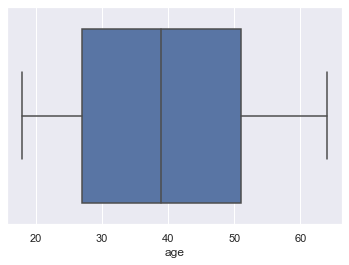

In [12]:
# Last step would be to plot the boxplot to observe the outliers.
sns.boxplot(x=data_new['age'])

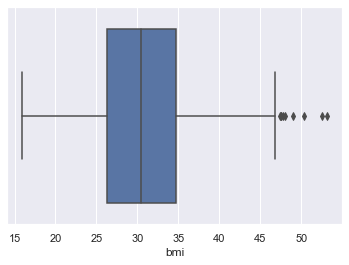

In [13]:
sns.boxplot(x=data_new['bmi'])

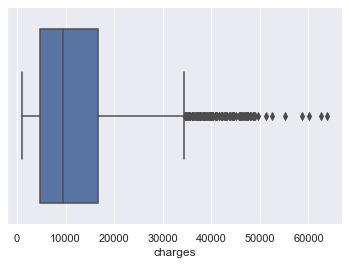

In [14]:
sns.boxplot(x=data_new['charges'])

In [15]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age             24.00000
bmi              8.41000
children         2.00000
charges      11911.37345
northeast        0.00000
northwest        0.00000
southeast        1.00000
southwest        0.00000
female           1.00000
male             1.00000
no               0.00000
yes              0.00000
dtype: float64


In [16]:
# Filter out the outliers by keeping only valid values
data_new = data_new[~((data_new < (Q1-1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]
data_new.shape

(267, 12)

#### After removing outliers from the data set, only 267 records are left.

### iv. Perform feature analysis (using correlation matrix with heatmap)

In [17]:
#get correlations of each features in dataset
corrmat = data_new.corr()

In [18]:
# removing the rows and columns which are the reason for NaN values
data_corr = data_new.drop(columns=['northeast','northwest','southeast','southwest','no','yes'])
corrmat = data_corr.corr()

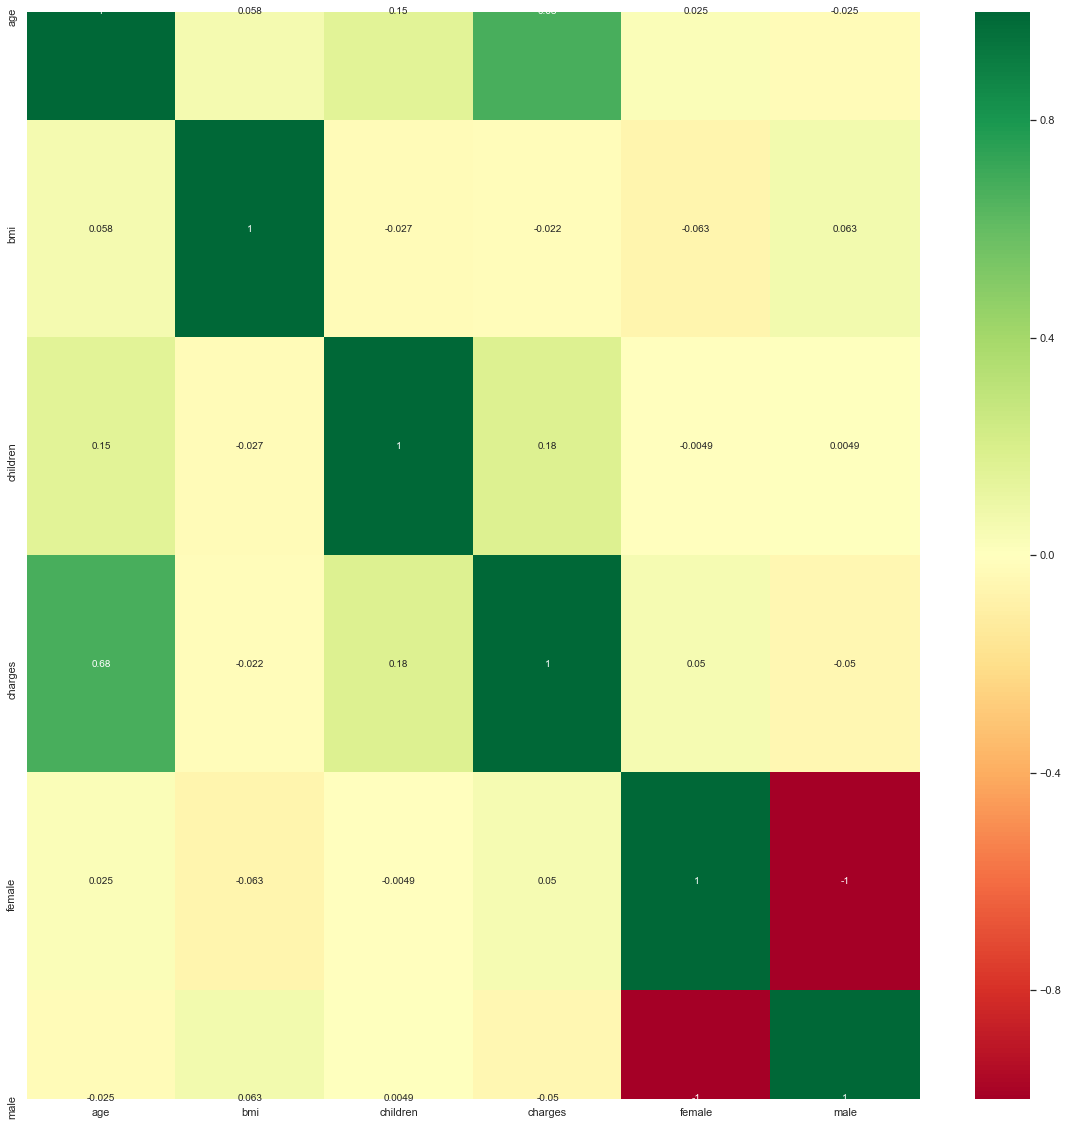

In [19]:
# plotting the heat map
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Here correlation of a feature with other features of the dataset can be seen.

In [20]:
# Create data dictionary
data_corr.to_dict('dict')

{'age': {1: 18.0,
  2: 28.0,
  5: 31.0,
  6: 46.0,
  13: 56.0,
  22: 18.0,
  25: 59.0,
  41: 31.0,
  42: 41.0,
  43: 37.0,
  48: 60.0,
  61: 25.0,
  68: 40.0,
  73: 58.0,
  76: 29.0,
  77: 21.0,
  90: 21.0,
  95: 28.0,
  97: 55.0,
  108: 29.0,
  118: 49.0,
  135: 22.0,
  138: 54.0,
  145: 29.0,
  147: 51.0,
  151: 48.0,
  159: 50.0,
  170: 63.0,
  181: 18.0,
  184: 44.0,
  186: 26.0,
  190: 61.0,
  192: 25.0,
  194: 18.0,
  197: 45.0,
  201: 48.0,
  206: 59.0,
  213: 34.0,
  217: 27.0,
  218: 26.0,
  219: 24.0,
  225: 55.0,
  226: 28.0,
  227: 58.0,
  231: 59.0,
  236: 18.0,
  237: 31.0,
  239: 44.0,
  246: 60.0,
  247: 24.0,
  257: 38.0,
  264: 53.0,
  270: 18.0,
  278: 59.0,
  279: 51.0,
  285: 46.0,
  289: 52.0,
  293: 22.0,
  302: 56.0,
  303: 28.0,
  307: 30.0,
  313: 49.0,
  326: 27.0,
  336: 60.0,
  339: 46.0,
  344: 49.0,
  345: 34.0,
  346: 33.0,
  348: 36.0,
  354: 18.0,
  356: 46.0,
  358: 23.0,
  359: 18.0,
  364: 21.0,
  374: 20.0,
  379: 62.0,
  382: 55.0,
  383: 35.0,
  

<Figure size 1440x1440 with 0 Axes>

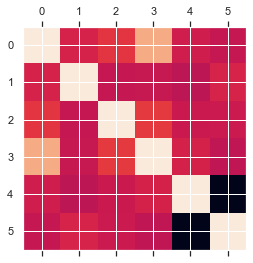

In [21]:
# Use data visualization to plot correlation matrix.
plt.figure(figsize=(20,20))
plt.matshow(data_corr.corr())

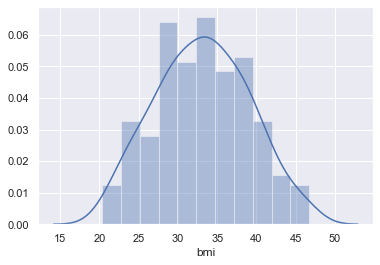

In [22]:
# Plot the distribution of 'bmi, 'age' & 'charges'
sns.distplot(data_corr['bmi'])

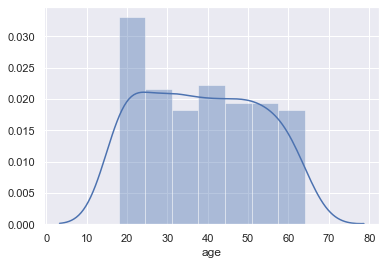

In [23]:
sns.distplot(data_corr['age'])

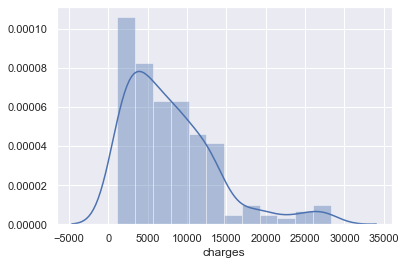

In [24]:
sns.distplot(data_corr['charges'])

In [25]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
data_corr[['age','bmi','charges']].skew()

age        0.093009
bmi        0.051641
charges    1.357325
dtype: float64

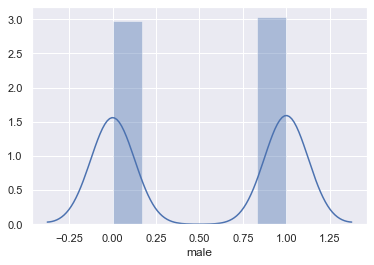

In [49]:
# Distribution of categorical columns
sns.distplot(data_new['male'])

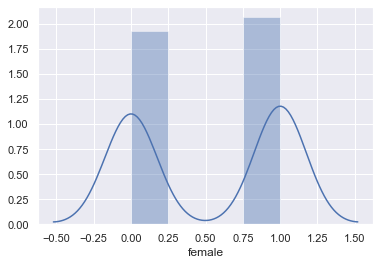

In [27]:
sns.distplot(data_new['female'])

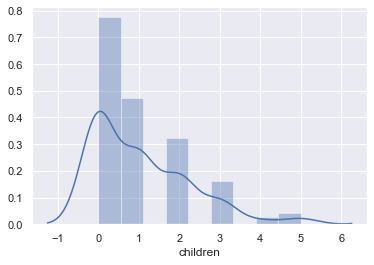

In [28]:
sns.distplot(data_new['children'])

C:\Users\utkarsh_khamgaonkar\Documents\Personal\Research\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\utkarsh_khamgaonkar\Documents\Personal\Research\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


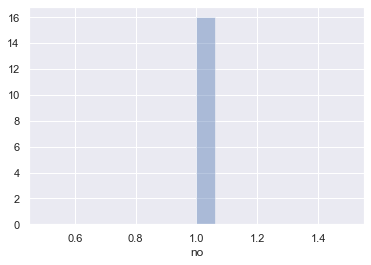

In [29]:
sns.distplot(data_new['no'])

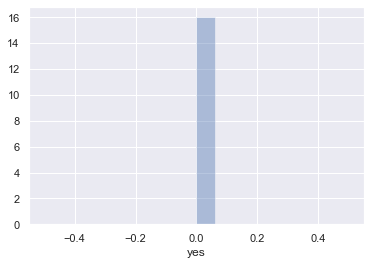

In [30]:
sns.distplot(data_new['yes'])

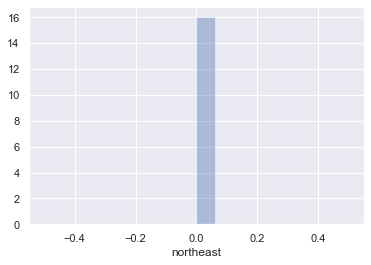

In [31]:
sns.distplot(data_new['northeast'])

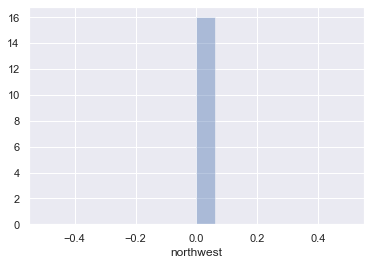

In [32]:
sns.distplot(data_new['northwest'])

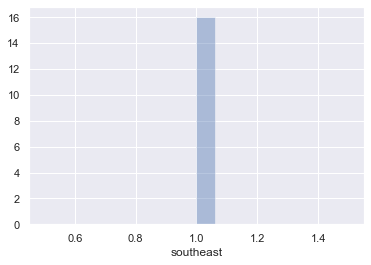

In [33]:
sns.distplot(data_new['southeast'])

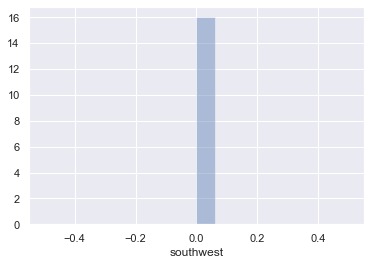

In [34]:
sns.distplot(data_new['southwest'])

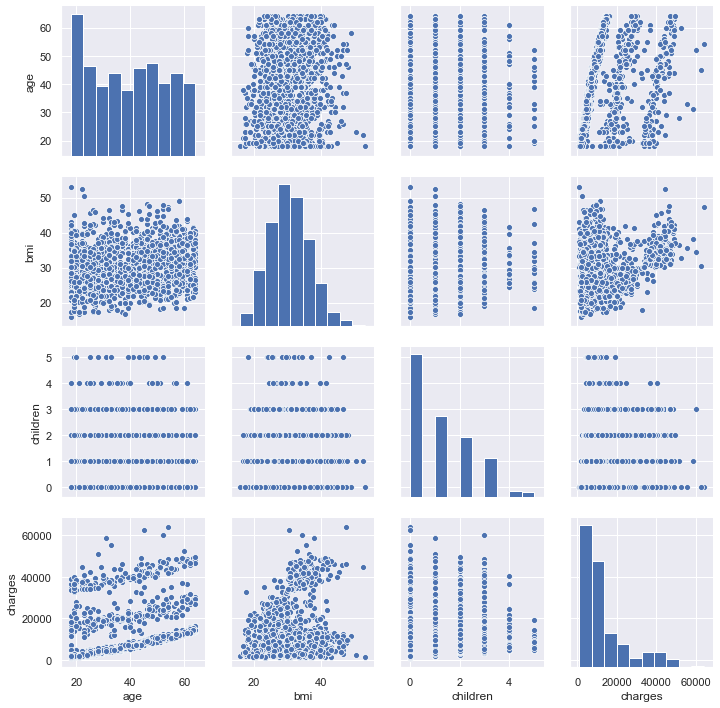

In [35]:
# Pair plot that includes all the columns of the data frame
sns.pairplot(data)

#### From above pairplot, we can conclude that there is a positive correlation between age and charges, i.e. charges increase when age increases.

## Do charges of people who smoke differ significantly from the people who don't?

#### Null Hypthesis (Ho) = The charges are equal, i.e. the mean charges of two groups (smokers and non-smokers) are equal.

#### Alternate Hypothesis (Ha) = The charges are not equal, i.e. the mean charges of two groups (smokers and non-smokers) are  not equal.

#### Significance level
$\alpha$ = 0.05

In [36]:
# charges of smokers
smokers_charges = data[data['smoker'] == 'yes'].charges
# charges of non-smokers
non_smokers_charges = data[data['smoker'] == 'no'].charges

In [37]:
# calculate p-value to compare mean charges of smokers vs non-smokers
t_statistic, p_value = ttest_ind(smokers_charges, non_smokers_charges)

In [38]:
# compare the calculated p-value with the assumed p-value of 0.05 and draw conclusion on hypothesis
# if p_value < 0.05 => alternate hypothesis, i.e. smokers and non-smokers do not have same mean charges at 5% significance level
if p_value < 0.05:
    print(f'With a p-value of {p_value} the difference is significant. Hence, we reject the null hypothesis.')
else:
    print(f'With a p-value of {p_value} the difference is not significant. Hence, we fail to reject the null hypothesis.')

With a p-value of 1.4067220949376498e-282 the difference is significant. Hence, we reject the null hypothesis.


## Does bmi of males differ significantly from that of females?

#### Null Hypothesis (Ho) = The mean bmi of males and females are equal.

#### Alternate Hypothesis (Ha) = The mean bmi of males and females are not equal.

#### Significance level
$\alpha$ = 0.05

In [39]:
# bmi of males
male_bmi = data[data['sex'] == 'male'].bmi
# bmi of females
female_bmi = data[data['sex'] == 'female'].bmi

In [40]:
# calculate p-value to compare mean bmi of males vs females
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)

In [41]:
# compare the calculated p-value with the assumed p-value of 0.05 and draw conclusion on hypothesis
# if p_value < 0.05 => alternate hypothesis, i.e. males and females do not have same mean bmi at 5% significance level
if p_value < 0.05:
    print(f'With a p-value of {p_value} the difference is significant. Hence, we reject the null hypothesis.')
else:
    print(f'With a p-value of {p_value} the difference is not significant. Hence, we fail to reject the null hypothesis.')

With a p-value of 0.08991704324931137 the difference is not significant. Hence, we fail to reject the null hypothesis.


## Is the proportion of smokers significantly different in different genders?

#### Null Hypothesis (Ho) = The proportions are equal.

#### Alternate Hypothesis (Ha) = The two proportions are not equal.

#### Significance level
$\alpha$ = 0.05

In [42]:
# number of female smokers
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  
# number of male smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] 
# number of females in the data
n_females = data.sex.value_counts()[1] 
#number of males in the data
n_males = data.sex.value_counts()[0] 

In [43]:
print(f' Proportion of smokers in females, males = {round(female_smokers/n_females,2)}%, {round(male_smokers/n_males,2)}% respectively')

 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [44]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. Hence, we reject the null hypothesis.')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. Hence, we fail to reject the null hypothesis.')

With a p-value of 0.0051 the difference is significant. Hence, we reject the null hypothesis.


## Is the distribution of bmi across women with no children, one child and two children, the same?

#### Null Hypothesis (Ho) : The mean bmi of women with no children, one child and two children are equal, i.e. $\mu1$ = $\mu2$ = $\mu3$

#### Alternate Hypothesis (Ha) : The mean bmi of women with no children, one child and two children are not equal, i.e. atleast one $\mu$ differs.

#### Significance level
$\alpha$ = 0.05

In [45]:
# Preparing data
mean_bmi_women_df = pd.DataFrame()

mean_bmi_women_nochildren = data[(data['sex'] == 'female') & (data['children'] == 0)].bmi
mean_bmi_women_onechild = data[(data['sex'] == 'female') & (data['children'] == 1)].bmi
mean_bmi_women_twochildren = data[(data['sex'] == 'female') & (data['children'] == 2)].bmi

df1 = pd.DataFrame({'Number_of_children': 0, 'Mean_BMI': mean_bmi_women_nochildren})
df2 = pd.DataFrame({'Number_of_children': 1, 'Mean_BMI': mean_bmi_women_onechild})
df3 = pd.DataFrame({'Number_of_children': 2, 'Mean_BMI': mean_bmi_women_twochildren})

mean_bmi_women_df = mean_bmi_women_df.append(df1)
mean_bmi_women_df = mean_bmi_women_df.append(df2)
mean_bmi_women_df = mean_bmi_women_df.append(df3)

In [46]:
# Calculate p-value using ANOVA table 
mod = ols('Mean_BMI ~ Number_of_children', data = mean_bmi_women_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                          sum_sq     df         F   PR(>F)
Number_of_children      2.512982    1.0  0.068411  0.79376
Residual            20717.738725  564.0       NaN      NaN


### Hypothesis testing based on calculated p value

In this example, p value is 0.79376 and it is more than our chosen level of signifance at 5%

So we fail to reject the null hypothesis at 5% level of significance.

#### So there is insufficient evidence to reject the null hypothesis. In other words, the mean bmi of women with no children, one child and two children are equal.